# SUEWS Quick Start Tutorial

This tutorial demonstrates the essential SUEWS workflow using the modern SuPy (Python) interface:

1. [Load sample data](#Load-sample-data)
2. [Run simulation](#Run-simulation)
3. [Explore results](#Explore-results)

## What is SUEWS?

SUEWS (Surface Urban Energy and Water Balance Scheme) is an urban climate model that simulates energy and water fluxes in urban environments. **SuPy** is the modern Python interface that provides powerful data analysis capabilities and seamless integration with the scientific Python ecosystem.

**Key Benefits of SuPy:**
- **Modern YAML configuration**: Type-safe, hierarchical parameter organization
- **pandas integration**: Powerful data analysis and visualization
- **Scientific Python ecosystem**: Works with NumPy, matplotlib, Jupyter notebooks
- **Built-in sample data**: Start immediately without complex setup

## Installation

Install SuPy with one command:

```bash
pip install supy
```

## Before We Start

Load the necessary packages:

In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [2]:
sp.show_version()

2025.11.19.dev7


## Load Sample Data

SuPy includes built-in sample data to get you started immediately. This is the recommended approach for learning SUEWS and testing functionality.

### Recommended Approach: Built-in Sample Data

Load sample data for immediate simulation. This approach provides built-in test data and configurations, perfect for learning and testing:

In [4]:
# Load built-in sample data using modern OOP API
from supy import SUEWSSimulation as ss

sim_sample = ss.from_sample_data()

# Extract state and forcing for examination
df_state_init = sim_sample.state_init
df_forcing = sim_sample.forcing

# Examine the sample data
print(" Sample data loaded successfully!")
print(f"Grid ID: {df_state_init.index[0]}")
print(f"Forcing period: {df_forcing.index[0]} to {df_forcing.index[-1]}")
print(f"Time steps: {len(df_forcing)}")

# For demonstration, use one year of data
df_forcing = df_forcing.loc["2012"].iloc[1:]
grid = df_state_init.index[0]

2025-11-19 23:45:56,771 - SuPy - INFO - Loading config from yaml
 Sample data loaded successfully!
Grid ID: 1
Forcing period: 2012-01-01 00:05:00 to 2013-01-01 00:00:00
Time steps: 105408


A sample `df_state_init` looks below (note that `.T` is used here to produce a nicer tableform view):

### Alternative: Complete Simulation in One Step

For even simpler usage, you can run a complete simulation with sample data in one command:

Run complete simulation with sample data in one step
```python
sim = SUEWSSimulation.from_sample_data()
sim.run()
df_output, df_state_final, df_forcing = sim.results, sim.df_state_final, sim.df_forcing
```
This approach is ideal for:
- Quick testing and demonstration
- Learning SUEWS output structure
- Benchmarking performance

For this tutorial, we'll use the step-by-step approach above for better learning

### Understanding the Input Data

SUEWS requires two main input datasets:

#### `df_state_init` - Initial Conditions and Site Configuration

`df_state_init` contains:
- **Surface characteristics**: albedo, emissivity, land cover fractions, building heights
- **Model configuration**: physics options, time stepping, output settings

For complete variable descriptions, see [Input Data Structures](../../data-structures/supy-io.ipynb#df_state_init:-model-initial-states)

In [7]:
df_state_init.loc[:, ["bldgh", "evetreeh", "dectreeh"]]

var,bldgh,evetreeh,dectreeh
ind_dim,0,0,0
grid,,,
1,22.0,13.1,13.1


In [8]:
df_state_init.filter(like="sfr_surf")

var     sfr_surf                                  
ind_dim     (0,)  (1,) (2,)  (3,)  (4,) (5,)  (6,)
grid                                              
1           0.43  0.38  0.0  0.02  0.03  0.0  0.14

#### `df_forcing` - Meteorological Forcing Data

`df_forcing` contains time series of meteorological variables that drive the urban climate simulation.

For complete variable descriptions, see [Input Data Structures](../../data-structures/supy-io.ipynb#df_forcing:-forcing-data).

Below is an overview of the key forcing variables in our sample dataset:

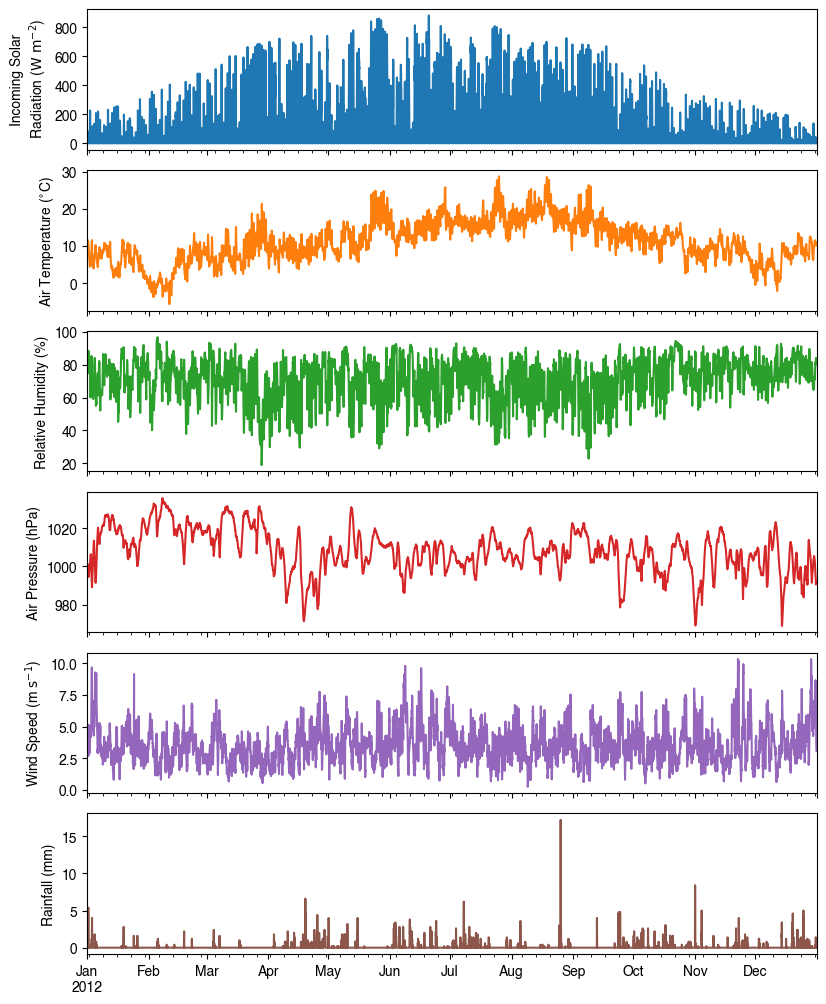

In [9]:
list_var_forcing = [
    "kdown",
    "Tair",
    "RH",
    "pres",
    "U",
    "rain",
]
dict_var_label = {
    "kdown": "Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)",
    "Tair": "Air Temperature ($^{\circ}$C)",
    "RH": r"Relative Humidity (%)",
    "pres": "Air Pressure (hPa)",
    "rain": "Rainfall (mm)",
    "U": "Wind Speed (m $\mathrm{s^{-1}}$)",
}
df_plot_forcing_x = (
    df_forcing.loc[:, list_var_forcing].copy().shift(-1).dropna(how="any")
)
df_plot_forcing = df_plot_forcing_x.resample("1h").mean()
df_plot_forcing["rain"] = df_plot_forcing_x["rain"].resample("1h").sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(8, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha="center")
for ax, var in zip(axes, list_var_forcing):
    _ = ax.set_ylabel(dict_var_label[var])

### Modifying Input Data

Since SuPy uses pandas DataFrames, you can easily modify input parameters using standard pandas operations. This is useful for sensitivity analyses or site-specific adjustments:

Given `pandas.DataFrame` is the core data structure of SuPy, all operations, including modification, output, demonstration, etc., on SuPy inputs (`df_state_init` and `df_forcing`) can be done using `pandas`-based functions/methods.

Specifically, for modification, the following operations are essential:

#### Locating Parameters

Data can be located in two ways:
1. **By name** using [`.loc`](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-label)
2. **By position** using [`.iloc`](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-position)

Data can be located in two ways, namely:
1. by name via [`.loc`](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-label);
2. by position via [`.iloc`](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-position).

In [10]:
# view the surface fraction variable: `sfr`
df_state_init.loc[:, "sfr_surf"]

ind_dim,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)","(6,)"
grid,,,,,,,
1,0.43,0.38,0.0,0.02,0.03,0.0,0.14


In [11]:
# view the second row of `df_forcing`, which is a pandas Series
df_forcing.iloc[1]

iy       2012.00
id          1.00
it          0.00
imin       15.00
qn       -999.00
qh       -999.00
qe       -999.00
qs       -999.00
qf       -999.00
U           4.61
RH         85.47
Tair       11.77
pres     1001.50
rain        0.00
kdown       0.16
snow     -999.00
ldown    -999.00
fcld     -999.00
Wuh         0.00
xsmd     -999.00
lai      -999.00
kdiff    -999.00
kdir     -999.00
wdir     -999.00
isec        0.00
Name: 2012-01-01 00:15:00, dtype: float64

In [12]:
# view a particular position of `df_forcing`, which is a value
df_forcing.iloc[8, 9]

np.float64(4.61)

#### Modifying Parameters

Setting new values is straightforward. After locating the variables to modify, simply assign new values:

Setting new values is very straightforward: after locating the variables/data to modify, just set the new values accordingly:

In [13]:
# modify surface fractions
df_state_init.loc[:, "sfr_surf"] = [0.1, 0.1, 0.2, 0.3, 0.25, 0.05, 0]
# check the updated values
df_state_init.loc[:, "sfr_surf"]

ind_dim,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)","(6,)"
grid,,,,,,,
1,0.1,0.1,0.2,0.3,0.25,0.05,0


## Run Simulation

Once forcing data (`df_forcing`) and initial conditions (`df_state_init`) are ready, call `sim.run()` to perform the SUEWS simulation. This stores results accessible via `sim.results` (or `sim.df_output`) and `sim.df_state_final`.

Once met-forcing (via `df_forcing`) and initial conditions (via `df_state_init`) are loaded in, we call `sim.run()` to conduct a SUEWS simulation, which will return two `pandas` `DataFrame`s: `df_output` and `df_state`.

In [16]:
# Run simulation
sim_sample.run()

# Access results
df_output = sim_sample.results
df_state_final = sim_sample.state_final

group                          BEERS                                  \
var                          azimuth   altitude GlobalRad DiffuseRad   
grid datetime                                                          
1    2012-01-01 00:05:00    0.931142 -61.632826      0.16        0.0   
     2012-01-01 00:10:00    3.347077 -61.603569      0.16        0.0   
     2012-01-01 00:15:00    5.756736 -61.541631      0.16        0.0   
     2012-01-01 00:20:00    8.155703 -61.447237      0.16        0.0   
     2012-01-01 00:25:00   10.539714 -61.320723      0.16        0.0   
...                              ...        ...       ...        ...   
     2012-12-31 23:40:00  348.749128 -61.223782      0.00        0.0   
     2012-12-31 23:45:00  351.124899 -61.359370      0.00        0.0   
     2012-12-31 23:50:00  353.516761 -61.463000      0.00        0.0   
     2012-12-31 23:55:00  355.920524 -61.534305      0.00        0.0   
     2013-01-01 00:00:00  358.339872 -61.573100      0.00        0.0   

group                                                                 ...  \
var                      DirectRad Kdown2d Kup2d Ksouth Kwest Knorth  ...   
grid datetime                                                         ...   
1    2012-01-01 00:05:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-01-01 00:10:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-01-01 00:15:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-01-01 00:20:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-01-01 00:25:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
...                            ...     ...   ...    ...   ...    ...  ...   
     2012-12-31 23:40:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-12-31 23:45:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-12-31 23:50:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-12-31 23:55:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2013-01-01 00:00:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   

group                         SUEWS                                       \
var                        Ts_Grass   Ts_BSoil   Ts_Water Ts_Paved_dyohm   
grid datetime                                                              
1    2012-01-01 00:05:00  12.870186  12.864744  12.862176      10.900448   
     2012-01-01 00:10:00  12.878201  12.872726  12.870134      10.818824   
     2012-01-01 00:15:00  12.869776  12.864282  12.861666      10.741024   
     2012-01-01 00:20:00  12.853404  12.847896  12.845258      10.666848   
     2012-01-01 00:25:00  12.833235  12.827717  12.825055      10.596105   
...                             ...        ...        ...            ...   
     2012-12-31 23:40:00  10.199067  10.818435  10.898584       6.309914   
     2012-12-31 23:45:00  10.185470  10.795352  10.873958       6.308790   
     2012-12-31 23:50:00  10.171681  10.772212  10.849304       6.307717   
     2012-12-31 23:55:00  10.135518  10.721713  10.796548       6.306691   
     2013-01-01 00:00:00  10.110590  10.685309  10.758330       6.305708   

group                                                                  \
var                      Ts_Bldgs_dyohm Ts_EveTr_dyohm Ts_DecTr_dyohm   
grid datetime                                                           
1    2012-01-01 00:05:00      10.972911      10.972911      10.972911   
     2012-01-01 00:10:00      10.818380      10.918016      10.918016   
     2012-01-01 00:15:00      10.678091      10.865010      10.865010   
     2012-01-01 00:20:00      10.550664      10.813818      10.813818   
     2012-01-01 00:25:00      10.434849      10.764369      10.764369   
...                                 ...            ...            ...   
     2012-12-31 23:40:00       2.748652       9.184894       9.184894   
     2012-12-31 23:45:00       2.747566       9.183812       9.183812   
     2012-12-31 23:50:00       2.746568     

### Understanding the Output

#### `df_output` - Simulation Results

`df_output` contains comprehensive SUEWS output organized into groups:

- **SUEWS**: Essential surface energy and water balance variables
- **DailyState**: Daily aggregated state information  
- **Snow**: Snow-related variables (when snow module is active)
- **RSL**: Rough sublayer scheme outputs
- **debug**: Debugging information

For complete variable descriptions, see [Output Data Structures](../../data-structures/supy-io.ipynb#df_output:-model-output-results)

In [17]:
df_output.columns.levels[0]

Index(['BEERS', 'DailyState', 'debug', 'EHC', 'NHood', 'RSL', 'snow',
       'SPARTACUS', 'STEBBS', 'SUEWS'],
      dtype='object', name='group')

#### `df_state_final` - Final Model State

`df_state_final` contains the model state at simulation end (or all states if `save_state=True`):

- Same structure as `df_state_init` for continuity
- Can be used as initial conditions for subsequent simulations
- Essential for spin-up procedures and long-term studies

For complete variable descriptions, see [Output Data Structures](../../data-structures/supy-io.ipynb#df_state_final:-model-final-states)

In [18]:
df_state_final.T.head()

datetime                 2012-01-01 00:05:00 2013-01-01 00:05:00
grid                                       1                   1
var              ind_dim                                        
ah_min           (0,)                   15.0                15.0
                 (1,)                   15.0                15.0
ah_slope_cooling (0,)                    2.7                 2.7
                 (1,)                    2.7                 2.7
ah_slope_heating (0,)                    2.7                 2.7

## Explore Results

Thanks to pandas integration and the PyData ecosystem, SuPy enables powerful analysis of SUEWS results through statistics, resampling, visualization, and much more.

Thanks to the functionality inherited from `pandas` and other packages under the [PyData](https://pydata.org) stack, compared with the standard SUEWS simulation workflow, `supy` enables more convenient examination of SUEWS results by statistics calculation, resampling, plotting (and many more).

### Output Data Structure

`df_output` uses MultiIndex for both rows and columns:
- **Index**: `(grid, datetime)` for spatial and temporal organization
- **Columns**: `(group, variable)` for organized output groups

In [19]:
df_output.head()

group                         BEERS                                            \
var                         azimuth   altitude GlobalRad DiffuseRad DirectRad   
grid datetime                                                                   
1    2012-01-01 00:05:00   0.931142 -61.632826      0.16        0.0       0.0   
     2012-01-01 00:10:00   3.347077 -61.603569      0.16        0.0       0.0   
     2012-01-01 00:15:00   5.756736 -61.541631      0.16        0.0       0.0   
     2012-01-01 00:20:00   8.155703 -61.447237      0.16        0.0       0.0   
     2012-01-01 00:25:00  10.539714 -61.320723      0.16        0.0       0.0   

group                                                       ...      SUEWS  \
var                      Kdown2d Kup2d Ksouth Kwest Knorth  ...   Ts_Grass   
grid datetime                                               ...              
1    2012-01-01 00:05:00     0.0   0.0    0.0   0.0    0.0  ...  12.870186   
     2012-01-01 00:10:00     0.0   0.0    0.0   0.0    0.0  ...  12.878201   
     2012-01-01 00:15:00     0.0   0.0    0.0   0.0    0.0  ...  12.869776   
     2012-01-01 00:20:00     0.0   0.0    0.0   0.0    0.0  ...  12.853404   
     2012-01-01 00:25:00     0.0   0.0    0.0   0.0    0.0  ...  12.833235   

group                                                                         \
var                        Ts_BSoil   Ts_Water Ts_Paved_dyohm Ts_Bldgs_dyohm   
grid datetime                                                                  
1    2012-01-01 00:05:00  12.864744  12.862176      10.900448      10.972911   
     2012-01-01 00:10:00  12.872726  12.870134      10.818824      10.818380   
     2012-01-01 00:15:00  12.864282  12.861666      10.741024      10.678091   
     2012-01-01 00:20:00  12.847896  12.845258      10.666848      10.550664   
     2012-01-01 00:25:00  12.827717  12.825055      10.596105      10.434849   

group                                                                  \
var                      Ts_EveTr_dyohm Ts_DecTr_dyohm Ts_Grass_dyohm   
grid datetime                                                           
1    2012-01-01 00:05:00      10.972911      10.972911      10.972911   
     2012-01-01 00:10:00      10.918016      10.918016      10.858234   
     2012-01-01 00:15:00      10.865010      10.865010      10.751578   
     2012-01-01 00:20:00      10.813818      10.813818      10.652340   
     2012-01-01 00:25:00      10.764369      10.764369      10.559964   

group                                                   
var                      Ts_BSoil_dyohm Ts_Water_dyohm  
grid datetime                                           
1    2012-01-01 00:05:00      10.972911      10.972911  
     2012-01-01 00:10:00      10.877112      10.877112  
     2012-01-01 00:15:00      10.786983      10.786983  
     2012-01-01 00:20:00      10.702157      10.702157  
     2012-01-01 00:25:00      10.622291      10.622291  

[5 rows x 1036 columns]

### Working with SUEWS Output

We'll focus on the essential `SUEWS` output group, which contains the main surface energy and water balance variables. The MultiIndex structure allows for powerful data selection and analysis:

In [20]:
df_output_suews = df_output["SUEWS"]

### Statistical Analysis

Use the `.describe()` method for quick overview of key energy balance components:

In [21]:
df_output_suews.loc[:, ["QN", "QS", "QH", "QE", "QF"]].describe()

var,QN,QS,QH,QE,QF
count,105408.000000,105408.000000,105408.000000,105408.000000,105408.000000
mean,39.841331,4.782061,75.036458,44.877688,84.854876
std,131.960919,43.124399,75.610215,55.890629,32.926429
min,-86.331686,-50.028263,-132.514514,0.088436,31.148865
25%,-42.499253,-27.242348,22.828886,1.233782,53.835755
50%,-25.756024,-7.833824,54.363213,20.270206,88.340645
75%,74.772812,16.669760,111.985158,72.722885,113.242338
max,679.848644,206.186682,412.005934,371.049669,161.706726


### Visualization

#### Quick Plotting Example

Plotting is straightforward using pandas' built-in `.plot()` method. Here we examine surface energy balance for one week in June:

#### Basic example
Plotting is very straightforward via the `.plot` method bounded with `pandas.DataFrame`.
Note the usage of `loc` for two slices of the output `DataFrame`.

In [22]:
# a dict for better display variable names
dict_var_disp = {
    "QN": "$Q^*$",
    "QS": r"$\Delta Q_S$",
    "QE": "$Q_E$",
    "QH": "$Q_H$",
    "QF": "$Q_F$",
    "Kdown": r"$K_{\downarrow}$",
    "Kup": r"$K_{\uparrow}$",
    "Ldown": r"$L_{\downarrow}$",
    "Lup": r"$L_{\uparrow}$",
    "Rain": "$P$",
    "Irr": "$I$",
    "Evap": "$E$",
    "RO": "$R$",
    "TotCh": "$\Delta S$",
}

#### Complete Summer Analysis

Let's examine the full summer period (June-August) urban energy balance:

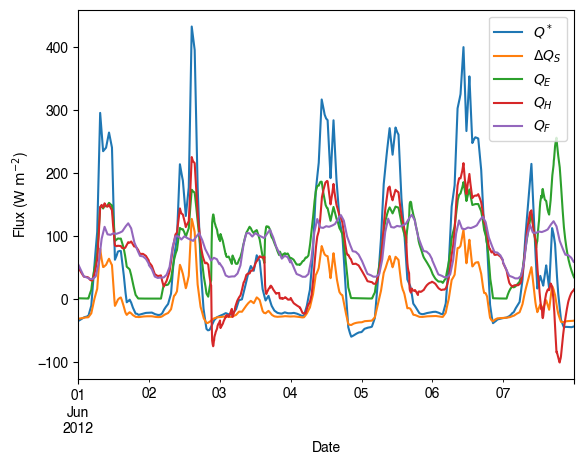

In [23]:
ax_output = (
    df_output_suews.loc[grid]
    .loc["2012 6 1":"2012 6 7", ["QN", "QS", "QE", "QH", "QF"]]
    .rename(columns=dict_var_disp)
    .plot()
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()

#### More examples
Below is a more complete example for examination of urban energy balance over the whole summer (June to August).

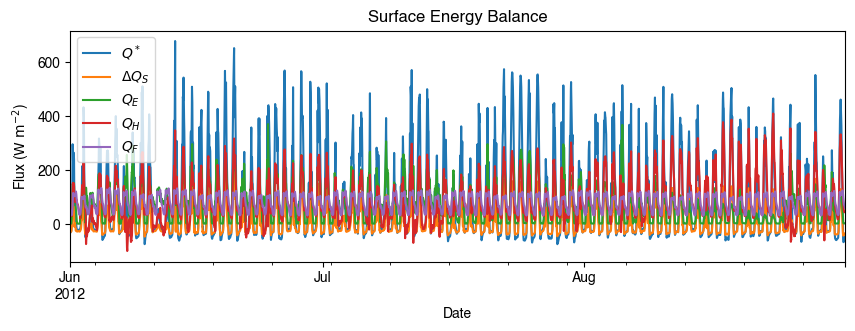

In [24]:
# energy balance
ax_output = (
    df_output_suews.loc[grid]
    .loc["2012 6":"2012 8", ["QN", "QS", "QE", "QH", "QF"]]
    .rename(columns=dict_var_disp)
    .plot(
        figsize=(10, 3),
        title="Surface Energy Balance",
    )
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()

### Temporal Resampling

SUEWS typically runs at 5-minute intervals, producing large datasets. Resampling to hourly or daily values improves analysis performance and reveals temporal patterns:

In [25]:
rsmp_1d = df_output_suews.loc[grid].resample("1d")
# daily mean values
df_1d_mean = rsmp_1d.mean()
# daily sum values
df_1d_sum = rsmp_1d.sum()

#### Daily Mean Energy Balance

Using daily averages makes plotting faster and reveals seasonal patterns:

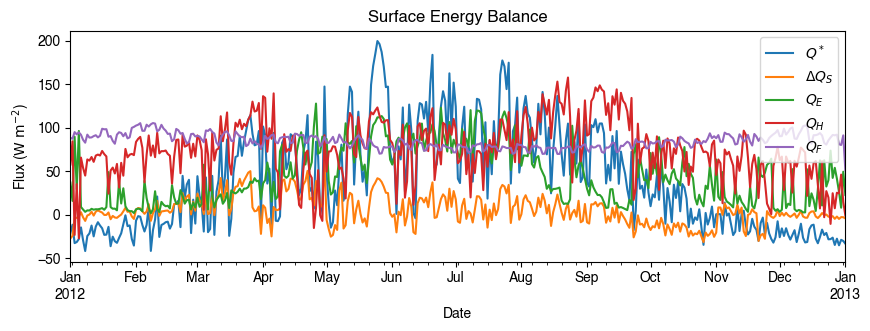

In [26]:
# energy balance
ax_output = (
    df_1d_mean.loc[:, ["QN", "QS", "QE", "QH", "QF"]]
    .rename(columns=dict_var_disp)
    .plot(
        figsize=(10, 3),
        title="Surface Energy Balance",
    )
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()

#### Multi-Component Analysis

Using the resampled data, we can examine both energy and water balance components:

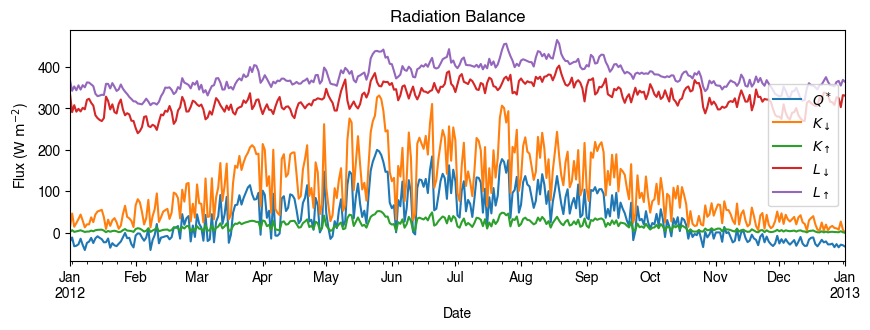

In [27]:
# radiation balance
ax_output = (
    df_1d_mean.loc[:, ["QN", "Kdown", "Kup", "Ldown", "Lup"]]
    .rename(columns=dict_var_disp)
    .plot(
        figsize=(10, 3),
        title="Radiation Balance",
    )
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()

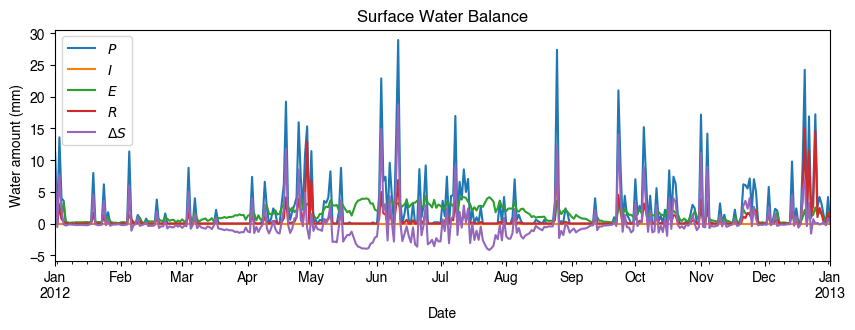

In [28]:
# water balance
ax_output = (
    df_1d_sum.loc[:, ["Rain", "Irr", "Evap", "RO", "TotCh"]]
    .rename(columns=dict_var_disp)
    .plot(
        figsize=(10, 3),
        title="Surface Water Balance",
    )
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Water amount (mm)")
_ = ax_output.legend()

#### Monthly Patterns

Get an overview of seasonal energy and water balance patterns:

In [29]:
# get a monthly Resampler
df_plot = df_output_suews.loc[grid].copy()
df_plot.index = df_plot.index.set_names("Month")
rsmp_1M = df_plot.shift(-1).dropna(how="all").resample("1M", kind="period")
# mean values
df_1M_mean = rsmp_1M.mean()
# sum values
df_1M_sum = rsmp_1M.sum()

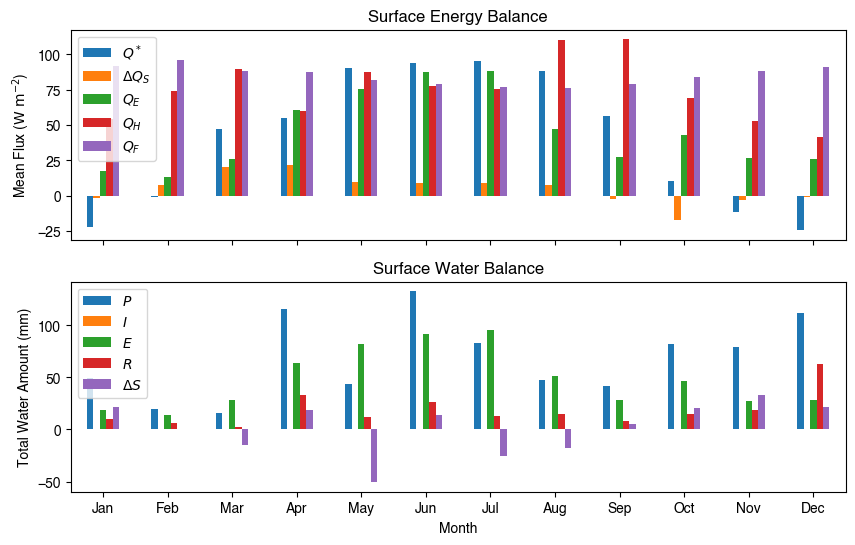

In [33]:
# month names
name_mon = [x.strftime("%b") for x in rsmp_1M.groups]
# create subplots showing two panels together
fig, axes = plt.subplots(2, 1, sharex=True)
# surface energy balance
_ = (
    df_1M_mean.loc[:, ["QN", "QS", "QE", "QH", "QF"]]
    .rename(columns=dict_var_disp)
    .plot(
        ax=axes[0],  # specify the axis for plotting
        figsize=(10, 6),  # specify figure size
        title="Surface Energy Balance",
        kind="bar",
    )
)
# surface water balance
_ = (
    df_1M_sum.loc[:, ["Rain", "Irr", "Evap", "RO", "TotCh"]]
    .rename(columns=dict_var_disp)
    .plot(
        ax=axes[1],  # specify the axis for plotting
        title="Surface Water Balance",
        kind="bar",
    )
)

# annotations
_ = axes[0].set_ylabel("Mean Flux ($ \mathrm{W \ m^{-2}}$)")
_ = axes[0].legend()
_ = axes[1].set_xlabel("Month")
_ = axes[1].set_ylabel("Total Water Amount (mm)")
_ = axes[1].xaxis.set_ticklabels(name_mon, rotation=0)
_ = axes[1].legend()

### Saving Results

SuPy provides convenient functions to save output in various formats for further analysis:

The `SUEWSSimulation.save()` function exports results to standard text files compatible with other analysis tools:

In [34]:
df_output

group                          BEERS                                  \
var                          azimuth   altitude GlobalRad DiffuseRad   
grid datetime                                                          
1    2012-01-01 00:05:00    0.931142 -61.632826      0.16        0.0   
     2012-01-01 00:10:00    3.347077 -61.603569      0.16        0.0   
     2012-01-01 00:15:00    5.756736 -61.541631      0.16        0.0   
     2012-01-01 00:20:00    8.155703 -61.447237      0.16        0.0   
     2012-01-01 00:25:00   10.539714 -61.320723      0.16        0.0   
...                              ...        ...       ...        ...   
     2012-12-31 23:40:00  348.749128 -61.223782      0.00        0.0   
     2012-12-31 23:45:00  351.124899 -61.359370      0.00        0.0   
     2012-12-31 23:50:00  353.516761 -61.463000      0.00        0.0   
     2012-12-31 23:55:00  355.920524 -61.534305      0.00        0.0   
     2013-01-01 00:00:00  358.339872 -61.573100      0.00        0.0   

group                                                                 ...  \
var                      DirectRad Kdown2d Kup2d Ksouth Kwest Knorth  ...   
grid datetime                                                         ...   
1    2012-01-01 00:05:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-01-01 00:10:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-01-01 00:15:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-01-01 00:20:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-01-01 00:25:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
...                            ...     ...   ...    ...   ...    ...  ...   
     2012-12-31 23:40:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-12-31 23:45:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-12-31 23:50:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2012-12-31 23:55:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   
     2013-01-01 00:00:00       0.0     0.0   0.0    0.0   0.0    0.0  ...   

group                         SUEWS                                       \
var                        Ts_Grass   Ts_BSoil   Ts_Water Ts_Paved_dyohm   
grid datetime                                                              
1    2012-01-01 00:05:00  12.870186  12.864744  12.862176      10.900448   
     2012-01-01 00:10:00  12.878201  12.872726  12.870134      10.818824   
     2012-01-01 00:15:00  12.869776  12.864282  12.861666      10.741024   
     2012-01-01 00:20:00  12.853404  12.847896  12.845258      10.666848   
     2012-01-01 00:25:00  12.833235  12.827717  12.825055      10.596105   
...                             ...        ...        ...            ...   
     2012-12-31 23:40:00  10.199067  10.818435  10.898584       6.309914   
     2012-12-31 23:45:00  10.185470  10.795352  10.873958       6.308790   
     2012-12-31 23:50:00  10.171681  10.772212  10.849304       6.307717   
     2012-12-31 23:55:00  10.135518  10.721713  10.796548       6.306691   
     2013-01-01 00:00:00  10.110590  10.685309  10.758330       6.305708   

group                                                                  \
var                      Ts_Bldgs_dyohm Ts_EveTr_dyohm Ts_DecTr_dyohm   
grid datetime                                                           
1    2012-01-01 00:05:00      10.972911      10.972911      10.972911   
     2012-01-01 00:10:00      10.818380      10.918016      10.918016   
     2012-01-01 00:15:00      10.678091      10.865010      10.865010   
     2012-01-01 00:20:00      10.550664      10.813818      10.813818   
     2012-01-01 00:25:00      10.434849      10.764369      10.764369   
...                                 ...            ...            ...   
     2012-12-31 23:40:00       2.748652       9.184894       9.184894   
     2012-12-31 23:45:00       2.747566       9.183812       9.183812   
     2012-12-31 23:50:00       2.746568     

In [36]:
# Save using OOP approach
list_path_save = sim_sample.save("output/")

## Next Steps

**Congratulations!** You've completed your first SUEWS urban climate simulation. Here's where to go next:

###  **Advanced Tutorials**
- **[Setup Your Own Site](./setup-own-site.ipynb)**: Configure SUEWS for your research location
- **[Impact Studies](./impact-studies.ipynb)**: Climate change and scenario analysis

###  **Configuration and Data**
- **[Data Structures Guide](../../data-structures/supy-io.ipynb)**: Detailed input/output documentation
- **[YAML Configuration](../../inputs/yaml/index.rst)**: Modern parameter management
- **Command-line wizard**: A configuration wizard tool is in development

### ️ **Urban Climate Science**
- **[Physical Principles](../../parameterisations-and-sub-models.rst)**: Understanding SUEWS physics
- **[Recent Publications](../../related_publications.rst)**: Latest SUEWS research applications

###  **Key Concepts You've Learned**
-  Loading sample data for immediate simulation
-  Running SUEWS urban climate simulations  
-  Understanding energy balance components (QN, QH, QE, QS, QF)
-  Data analysis with pandas integration
-  Visualization and temporal resampling
-  Saving results for further analysis

###  **Real Research Applications**
This tutorial used sample data, but SuPy enables sophisticated urban climate research:
- **Urban heat island studies** across different cities
- **Climate change impact assessment** for urban areas
- **Building energy modeling** integration
- **Multi-site comparative studies** with parallel processing
- **Policy scenario analysis** for urban planning

Ready to apply SUEWS to your research? Start with **[Setup Your Own Site](./setup-own-site.ipynb)**!

In [37]:
# Display saved files
for file_out in list_path_save:
    print(f" {file_out.name}")

print("\n Congratulations! You've completed your first SUEWS simulation.")
print(" Results saved in multiple formats for further analysis.")
print(" Ready for more advanced applications!")

 KCL1_2012_SUEWS_60.txt
 df_state_KCL.csv

 Congratulations! You've completed your first SUEWS simulation.
 Results saved in multiple formats for further analysis.
 Ready for more advanced applications!
